## Step1: Reading and understanding of data

In [2]:
# Imprt necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import r2_score


In [4]:
# import for supress warnings
import warnings
warnings.filterwarnings('ignore')


#### Reading of data

In [5]:
#Read the data from csv file
df_data = pd.read_csv('day.csv')


In [6]:
#Check the data
df_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect data

In [7]:
#shape of the data
df_data.shape

(730, 16)

In [8]:
#info about data , columns, counts, data type
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Describe, to see ranges of data in the columns
df_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### check missing values and duplicates

In [10]:
#Check for missing values
df_data.isnull().sum() 


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing data for variables, so no data imputation is required

In [11]:
#Drop any duplicate entries in the data
df_data.drop_duplicates(inplace=True)

In [12]:
df_data.shape

(730, 16)

Shape is same after drop duplicates, means there are no duplicates in the data

#### Inspecting each column

In [13]:
df_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
print(df_data['instant'].value_counts())
print(df_data['instant'].nunique())

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64
730


Drop unwanted features:
- Instant is like index, all values are unique so it does not help in predection, it can be dropped
- date column can be dropped as the montha bd year columns are present
- casual,registered are just the breakup of the count column, so they can be dropped

In [15]:
#Print all columns
df_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
#drop instance,dteday,casual,registered columns
df_data.drop(['instant','dteday','registered','casual'],axis=1,inplace=True)

In [17]:
#columns after dropping
df_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Handling categorical variables

Convert categorical columns to readable values

In [18]:
#map the season column
df_data['season'] = df_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [19]:
#map the month colums
df_data['mnth'] = df_data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [20]:
#map week day column
df_data['weekday'] = df_data['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [21]:
#map the weathersit column
df_data['weathersit'] = df_data['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [22]:
df_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## Step2 : EDA: Visualization of the data

### EDA for numerical variables
'temp', 'atemp', 'hum', 'windspeed', 'cnt'

#### Univariate analysis

<AxesSubplot:xlabel='cnt'>

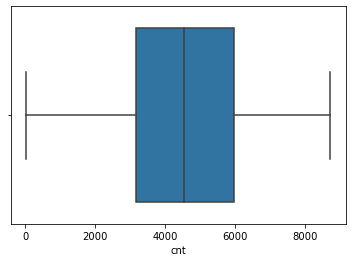

In [25]:
sns.boxplot(df_data['cnt'])

<AxesSubplot:xlabel='temp'>

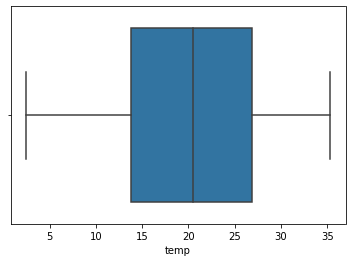

In [26]:

sns.boxplot(df_data['temp'])

<AxesSubplot:xlabel='windspeed'>

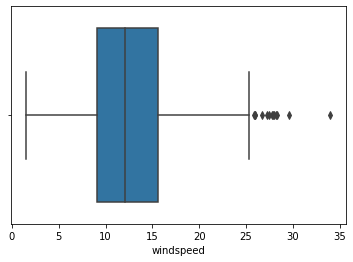

In [24]:
sns.boxplot(df_data['windspeed'])

<AxesSubplot:xlabel='hum'>

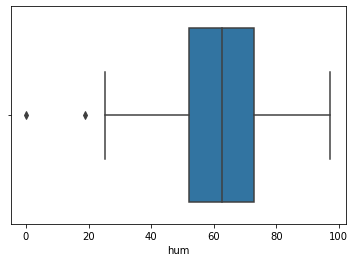

In [25]:
sns.boxplot(df_data['hum'])

There are no potential outliers to be removed

#### Bivariate analysis

Visualizing target count variable vs the numerical columns

 'temp', 'atemp', 'hum', 'windspeed', 'cnt'

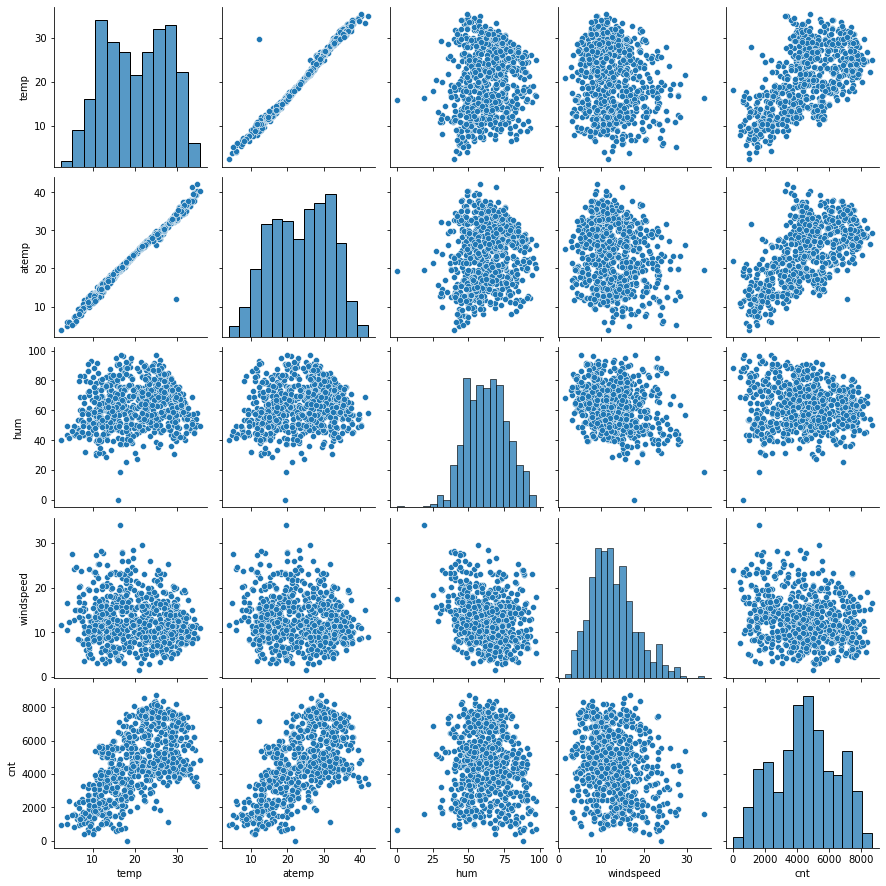

In [27]:
#visualizing target count variable vs the numerical columns. using pair scatter plots
#temp, atemp, hum, windspeed, cnt
sns.pairplot(data=df_data, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

Count shows clear linear relation with temp, atemp. Temp and atemp also correlated

#### multivariate analysis

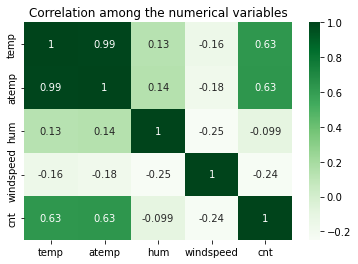

In [28]:
#draw correlation matrix for all the numerical variables to see the multicolinearity
corr_matrx= df_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrx,annot=True,cmap = 'Greens')
plt.title("Correlation among the numerical variables")
plt.show()


Count shows correlation with temp, atemp

There is a strong correlation between temp and atemp, both cannot be used for predecting cnt target because of multicolinearity. One of them has to be removed based on the VIF considering their relation with all other variables.Will be done later in the process

### EDA for categorical variables

Visualizing target count variable vs the categorical columns

'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit'

In [29]:
'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit',  'cnt'

('season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'cnt')

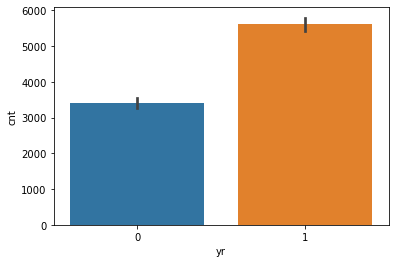

In [30]:
sns.barplot(x='yr', y='cnt', data=df_data)
plt.show()

In [31]:
df_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


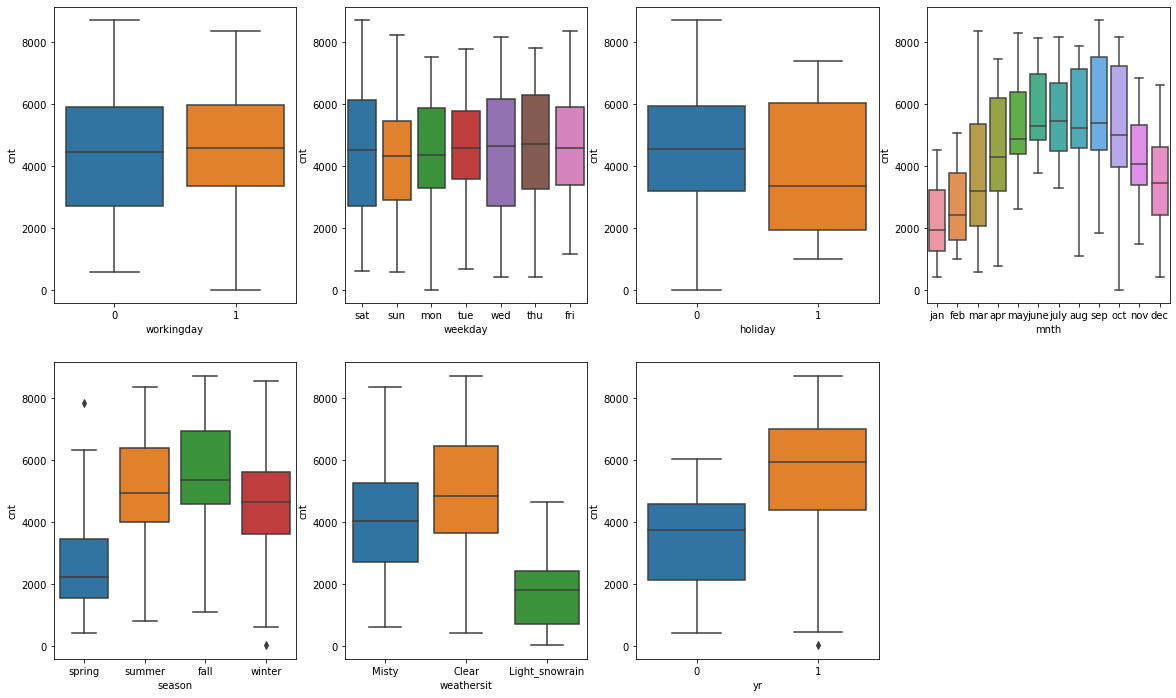

In [32]:
#visualise all variables againt target variable cnt
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'season', y = 'cnt', data = df_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df_data)
plt.show()

In [33]:
# Create a code method to plot categorical variables with target and year as hue
def brplot_withHue(col):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)    
    sns.barplot(x= col,y='cnt',data=df_data) #barplot for given col and cnt
    plt.subplot(1,2,2)
    sns.barplot(x=col,y='cnt',hue='yr',data=df_data) #barplot for given col, year and cnt
    plt.show()

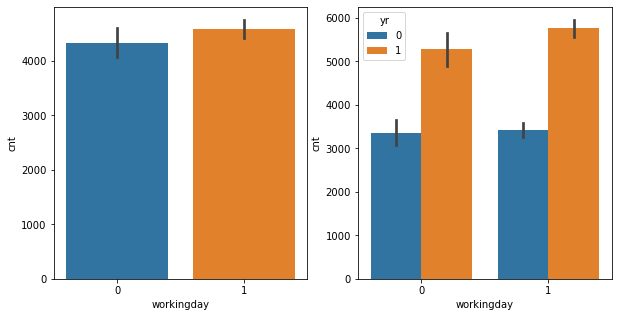

In [34]:
#plot for workingday column
brplot_withHue('workingday')

Booking is almost equal on working day or non-working day. But, the count increased from 2018 to 2019.

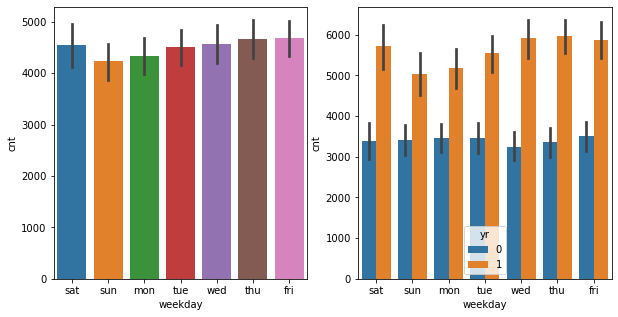

In [36]:
#plot for weekday column
brplot_withHue('weekday')

Sunday has less booking, but there is no significant difference in booking within days of week.All days bookings incresed in 2019

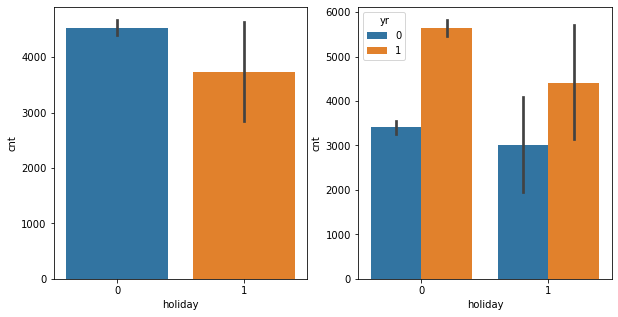

In [37]:

#plot for holiday column
brplot_withHue('holiday')

When its not holiday, booking are less in number which seems logical as on holidays, people may want to spend time at home and enjoy with family. Bookings increase in 2019

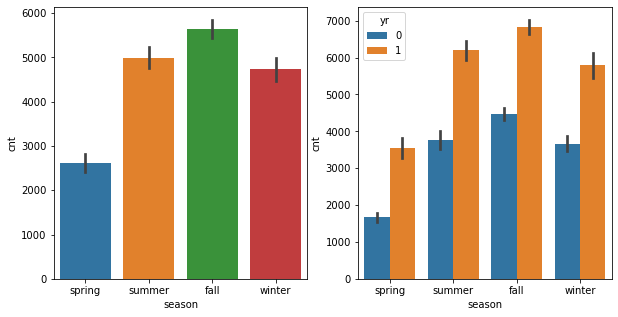

In [38]:
#plot for season column
brplot_withHue('season')

Fall season have more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

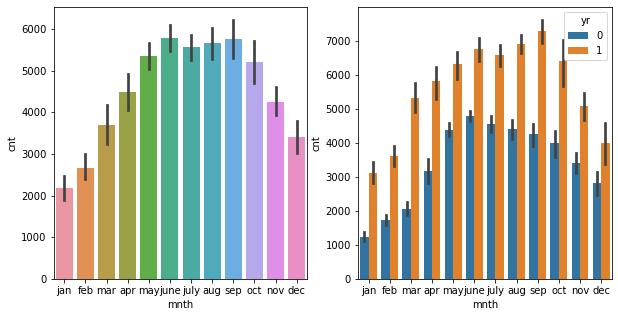

In [39]:

#plot for mnth column
brplot_withHue('mnth')

Most of the bookings occurred between May and October, with a noticeable increase in bookings from the start of the year until mid-year. After that, the number of bookings began to decline as the year progressed towards its end.
Additionally, the number of bookings per month appears to have increased from 2018 to 2019.

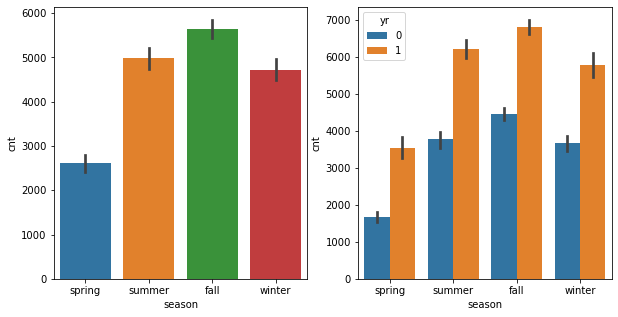

In [40]:
#plot for weathersit column
brplot_withHue('season')

Fall season have more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

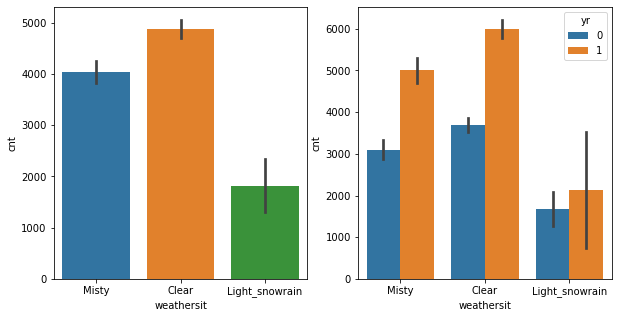

In [41]:
#plot for weathersit column
brplot_withHue('weathersit')

When the weather is clear there are more booking which seems obvious. And in comparison booking increased for each weather condition in 2019.

Overall the strong pattern is the bike bookings are drastically increased in year 2019  

## Step3: Data Preparation for Machine Learning - Feature Engineering

#### Handling of categorical variables

'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit'




'yr', 'workingday','holiday' are already in binary form so there is not change required

Create dummy variables for 'season', 'mnth', 'weekday','weathersit'

In [42]:
#Create dummy variables for 'season', 'mnth', 'weekday','weathersit'
df_seasons = pd.get_dummies(df_data['season'],drop_first=True)
df_mnth = pd.get_dummies(df_data['mnth'],drop_first=True)
df_weekday = pd.get_dummies(df_data['weekday'],drop_first=True)
df_weathersit = pd.get_dummies(df_data['weathersit'],drop_first=True)

In [43]:
df_seasons.head()


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
df_mnth.head()


,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [45]:
df_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [46]:
# concatinate dummy variables dataset with original data
df_data_new = pd.concat([df_data,df_mnth,df_seasons,df_weekday,df_weathersit],axis=1)


In [47]:
df_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [48]:
df_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [49]:
#drop 'season', 'mnth', 'weekday','weathersit', as they are already added as dummies
df_data_new.drop(['season', 'mnth', 'weekday','weathersit'],axis=1,inplace=True)

In [50]:
df_data_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
print(df_data_new.info())
print('shape:', df_data_new.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

In [53]:
df_data_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'spring', 'summer', 'winter', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'Light_snowrain', 'Misty'],
      dtype='object')

#### Split data into train and test sets

In [54]:
#### Split data into train and test sets
df_train , df_test = train_test_split(df_data_new, train_size=0.7,test_size=0.3,random_state=100)

In [55]:
df_train.shape 


(510, 30)

In [56]:
df_test.shape

(219, 30)

#### scale feature using minmax scaler

In [57]:
scaler = MinMaxScaler()

In [58]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,1,0,0,0,0,0,1


In [59]:
# apply scaling to numerical and taget variable only, because others are in anyway binary form so scaling is not required
col_sclae = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] 
# Fro train data we apply fit and transform here. for test data use only transform
df_train[col_sclae] = scaler.fit_transform(df_train[col_sclae])

In [60]:
#verify data
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,1,0,0,0,0,0,1


In [61]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.245098,0.24902,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.430568,0.43287,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

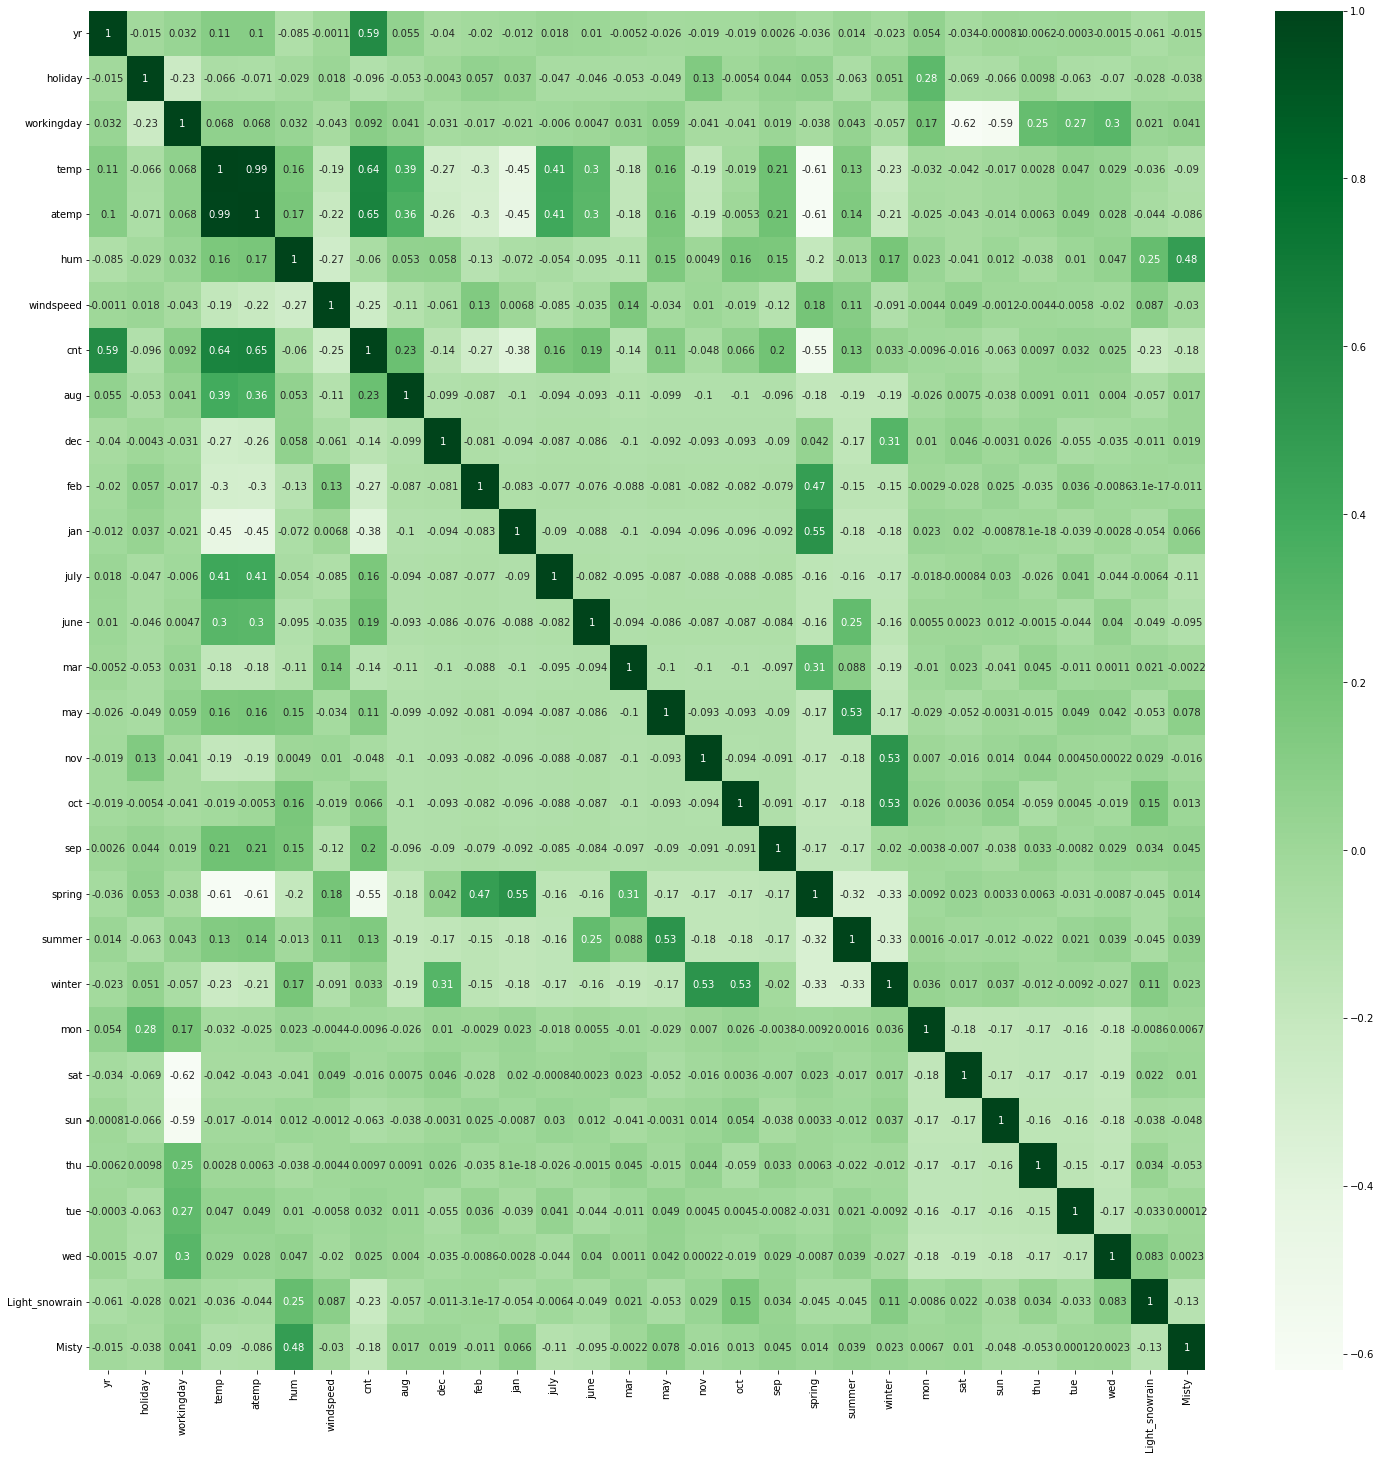

In [62]:
#Plot correlation matrix
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,cmap='Greens')

count shows high correlation with year and temp, a temp. there are multicorrelated variables also

In [63]:
#Separate the predictor variables (features) and target variable for training.
y_train = df_train.pop('cnt') # it will be a series
X_train = df_train #data frame

## Step 4 : Building model

In [64]:
#see the number of columns in train set
X_train.shape[1]

29

#### RFE: Recurssive feature elemination to minimise the features at the start

In [65]:
#RFE, first build the model using sk learn to use in RFE

lm= LinearRegression()
lm.fit(X_train,y_train)

rfe= RFE(lm,15) # start with top 15 features
rfe = rfe.fit(X_train,y_train)

In [66]:
#List all the variables with their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [67]:
#selected columns via rfe
rfe_cols= X_train.columns[rfe.support_]
print(rfe_cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'spring', 'summer', 'winter', 'sat', 'Light_snowrain',
       'Misty'],
      dtype='object')


In [68]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [69]:
#dataframe with trainset only for RFE selected columns
X_train_rfe = X_train[rfe_cols]

In [70]:
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,jan,july,sep,spring,summer,winter,sat,Light_snowrain,Misty
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,0,0,0,1,0,0,0,1
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,1,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,0,0,0,1,1,0,1


### Build model using stats model and finetune based on Rsquare and p-value of features

In [71]:
# Build model using stats model - Pass 1
X_train_1 = X_train_rfe.copy()

In [72]:

#add constant as the stat model does not add it internally
X_train_lm_1 = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()

In [73]:
#print model summary
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          2.31e-191
Time:                        06:05:26   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.

Zow calculate VIF for these columns to remove high VIF columns. 
VIF>5 columns to be removed later in the process

In [74]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [75]:
#calculate VIF
calculateVIF(X_train_1)

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
9,spring,4.53
11,winter,3.48
10,summer,2.84
14,Misty,2.29
0,yr,2.09
12,sat,1.98


In [76]:
#Humidity shows very high VIF, so drop it
X_train_2=X_train_1.drop(['hum'],axis=1)

In [77]:
# Build model using stats model- pass 2 , after dropping humidity
#add constant as the stat model does not add it internally
X_train_lm_2 = sm.add_constant(X_train_2)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
#print model summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          7.33e-189
Time:                        06:05:40   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

 R-squared: 0.838, and p-vlaue are are good, improve further by removing the high VIF variables

In [78]:
#calculate VIF once again for remainaing variables
calculateVIF(X_train_2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
8,spring,3.08
9,summer,2.33
0,yr,2.08
10,winter,1.99
11,sat,1.97
5,jan,1.62
6,july,1.59


In [79]:
#temp shows very high VIF, so drop it
X_train_3=X_train_2.drop(['temp'],axis=1)

In [80]:
# Build model using stats model- pass 3 , after dropping temp
#add constant as the stat model does not add it internally
X_train_lm_3 = sm.add_constant(X_train_3)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
#print model summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          4.04e-154
Time:                        06:05:52   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5448      0.020     27.

In [81]:
#calculate VIF once again for remainaing variables
calculateVIF(X_train_3)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
7,spring,2.97
8,summer,2.27
9,winter,1.99
0,yr,1.91
10,sat,1.69
4,jan,1.60
12,Misty,1.56
5,july,1.30


holiday has high p-value so drop it

In [82]:
#temp shows very high VIF, so drop it
X_train_4=X_train_3.drop(['holiday'],axis=1)

In [83]:
# Build model using stats model- pass 4 , after dropping holiday
#add constant as the stat model does not add it internally
X_train_lm_4 = sm.add_constant(X_train_4)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
#print model summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          1.54e-154
Time:                        06:06:08   Log-Likelihood:                 424.11
No. Observations:                 510   AIC:                            -822.2
Df Residuals:                     497   BIC:                            -767.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5368      0.020     27.

In [84]:
#calculate VIF once again for remainaing variables
calculateVIF(X_train_4)

,Features,VIF
2,windspeed,4.21
1,workingday,3.54
6,spring,2.92
7,summer,2.25
8,winter,1.92
0,yr,1.91
9,sat,1.62
3,jan,1.60
11,Misty,1.56
4,july,1.29


In [85]:
#july shows very high VIF, so drop it
X_train_5=X_train_4.drop(['july'],axis=1)

In [86]:
# Build model using stats model- pass 4 , after dropping holiday
#add constant as the stat model does not add it internally
X_train_lm_5 = sm.add_constant(X_train_5)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
#print model summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          1.30e-155
Time:                        06:06:18   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5334      0.018     30.

#### Model Selection

Model accuracy is coming down , model with good accuracy is model 2 with columns X_train_2


In [87]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          7.33e-189
Time:                        06:06:21   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

#### Model Summary: 
lr_2 can be considered as good model, 
- All the predictors p-values are less than 0.05
- Very low Multi colinearity among predictors
- R^2 is 0.843, Adjusted R^2 is 0.839. Predictor are explaing the variation of the target varaible
- F-statistic: 190.3,Prob (F-statistic): 7.33e-189, very close to 0,  means the model is statistically significant


In [91]:
X_train_2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'jan', 'july',
       'sep', 'spring', 'summer', 'winter', 'sat', 'Light_snowrain', 'Misty'],
      dtype='object')

In [92]:
y_train_pred = lr_2.predict(X_train_lm_2)

In [90]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8433190474592366

Plot the distribution of error terms

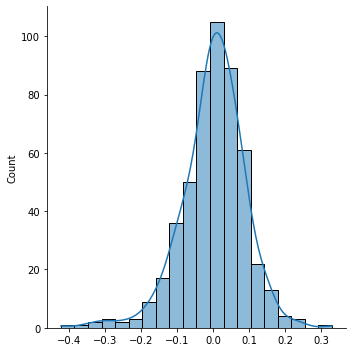

In [93]:
sns.displot((y_train - y_train_pred), bins=20, kde=True)

Error terms are normally distributed, this model is best to be used for predection

#### Build model using sklearn linear regression

In [94]:
#X_train_2 is the best data set identified with RFE, use this for training model 
lin_Reg_m = LinearRegression()
lin_Reg_m.fit(X_train_2,y_train)
print(lin_Reg_m.intercept_)
print(lin_Reg_m.coef_)

0.1736632211677338
[ 0.23436119 -0.05619854  0.04650186  0.47282287 -0.15626441 -0.03894665
 -0.0482218   0.07531816 -0.05970401  0.04335231  0.0796991   0.05843354
 -0.29172726 -0.08262114]


Check r2_score for the model

In [95]:
r2_score_train = lin_Reg_m.score(X_train_2,y_train)
print("r2_score on training data :" , r2_score_train)

r2_score on training data : 0.8433190474592366


In [96]:
y_train_pred = lin_Reg_m.predict(X_train_2)

##### Run prediction on the test data

In [97]:
#FOR MAKING PREDECTION, scale test data as per train data
df_test[col_sclae] = scaler.transform(df_test[col_sclae]) #min max values are fit based on train data. So only transform for test data
y_test = df_test.pop('cnt') # it will be a series


In [98]:
X_test =df_test

In [99]:
X_train_2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'jan', 'july',
       'sep', 'spring', 'summer', 'winter', 'sat', 'Light_snowrain', 'Misty'],
      dtype='object')

In [100]:
#remove columns that are not used for predection
X_test = X_test[X_train_2.columns]

In [101]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'jan', 'july',
       'sep', 'spring', 'summer', 'winter', 'sat', 'Light_snowrain', 'Misty'],
      dtype='object')

In [102]:
y_test_pred = lin_Reg_m.predict(X_test)

In [103]:
r2_score_test = lin_Reg_m.score(X_test,y_test)
print("r2_score on test data : " , r2_score_test)

r2_score on test data :  0.8045478865351156


In [104]:
r2_score(y_test,y_test_pred)

0.8045478865351156

Train r2_score : 0.8433190474592366

Test r2_score: 0.8045478865351156


## Step 5: Residual analysis, checking linear regression assumptions

##### Verify normal distribution of errors : Train data

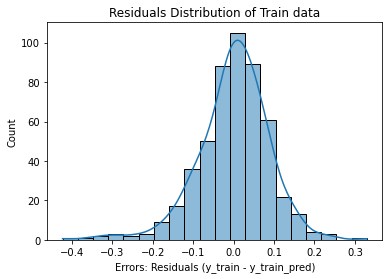

In [105]:
fig= plt.figure()
sns.histplot((y_train - y_train_pred),kde= True, bins=20)
plt.title('Residuals Distribution of Train data')
plt.xlabel('Errors: Residuals (y_train - y_train_pred)')
plt.ylabel('Count')
plt.show()

##### Multicolinearity

In [101]:
calculateVIF(X_train_3)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
7,spring,2.97
8,summer,2.27
9,winter,1.99
0,yr,1.91
10,sat,1.69
4,jan,1.60
12,Misty,1.56
5,july,1.30


#### Homoscedasticity

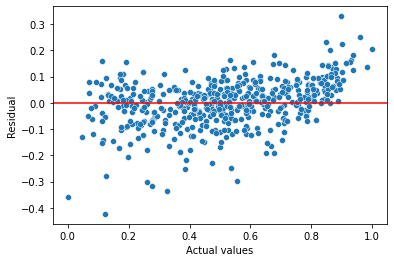

In [106]:
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.axhline(y=0, color='r')
plt.xlabel('Actual values')
plt.ylabel('Residual')
plt.show()

All assumption are validated
- As shown in the pair plots the input variables have visible linear relation with target
- Errors are normally distributed
- there is no multicolinearity between predictors
- No visible pattern in the errors


## Step 6: Evaluating model for test predections

In [107]:
r2_score(y_test,y_test_pred)

0.8045478865351156

##### Verify normal distribution of errors : Test data

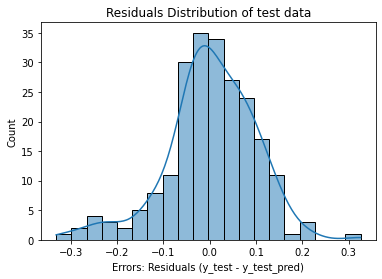

In [108]:
fig= plt.figure()
sns.histplot((y_test - y_test_pred),kde= True, bins=20)
plt.title('Residuals Distribution of test data')
plt.xlabel('Errors: Residuals (y_test - y_test_pred)')
plt.ylabel('Count')
plt.show()

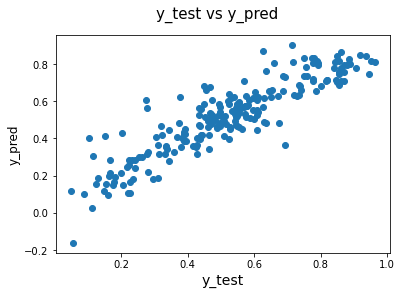

In [109]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 
plt.show()

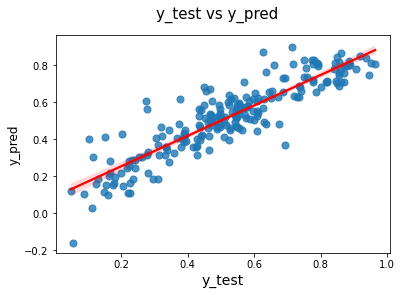

In [110]:
# Create a figure and axis
fig = plt.figure()

# Create the regression plot with a regression line
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Title and labels
fig.suptitle('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_pred', fontsize=12)

# Show the plot
plt.show()

## Model conclusion

Train r2_score : 0.8433190474592366

Test r2_score: 0.8045478865351156

Important vaiables for predection of bikes demand:

'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'jan', 'july',
'sep', 'spring', 'summer', 'winter', 'sat', 'Light_snowrain', 'Misty'

In [111]:
#print intercept 
print("model intercept:", lin_Reg_m.intercept_)

model intercept: 0.1736632211677338


In [112]:
#print coefficients
for feature, coef in zip(X_train_2.columns, lin_Reg_m.coef_):
    print(f"Coefficient for {feature}: {round(coef, 5)}")

Coefficient for yr: 0.23436
Coefficient for holiday: -0.0562
Coefficient for workingday: 0.0465
Coefficient for temp: 0.47282
Coefficient for windspeed: -0.15626
Coefficient for jan: -0.03895
Coefficient for july: -0.04822
Coefficient for sep: 0.07532
Coefficient for spring: -0.0597
Coefficient for summer: 0.04335
Coefficient for winter: 0.0797
Coefficient for sat: 0.05843
Coefficient for Light_snowrain: -0.29173
Coefficient for Misty: -0.08262


Finding top contributors, print sorted

In [113]:

# Get the feature names and coefficients as a list of tuples
feature_importance = list(zip(X_train_2.columns, lin_Reg_m.coef_))

# Sort the list based on the actual coefficients (positive and negative)
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Print the sorted coefficients
for feature, coef in sorted_feature_importance:
    print(f"Coefficient for {feature}: {round(coef, 5)}")

Coefficient for temp: 0.47282
Coefficient for yr: 0.23436
Coefficient for winter: 0.0797
Coefficient for sep: 0.07532
Coefficient for sat: 0.05843
Coefficient for workingday: 0.0465
Coefficient for summer: 0.04335
Coefficient for jan: -0.03895
Coefficient for july: -0.04822
Coefficient for holiday: -0.0562
Coefficient for spring: -0.0597
Coefficient for Misty: -0.08262
Coefficient for windspeed: -0.15626
Coefficient for Light_snowrain: -0.29173
